In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import plotly.graph_objects as go


## Sankey Plot

In [2]:
def Plot(sheet_name, label, source, target, value):
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 30,
          thickness = 20,
          line = None, # dict(color = "black", width = 0.5),
          label = label,
          color = None # "blue"
        ),
        link = dict(
          source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = target,
          value = value
      ))])

    fig.update_layout(title_text=sheet_name, font_size=10)
    fig.show()


# Import and clean up the table

In [3]:
#df=pd.read_excel("Brazil_Energy balance matrix.xlsx",sheet_name="2010 - Brazil",skiprows=4,nrows=28)

Dict=pd.read_excel("Brazil_Energy balance matrix.xlsx", sheet_name=None, skiprows=range(4), skipfooter=3)


In [4]:

def Data_Generate(Dict):
    
    Dict_out = {}  # Initialize the output dictionary
    for sheet_name in Dict.keys():

        df=Dict[sheet_name]


        df=df.drop([0])

        # Rename some columns 
        df.rename(columns={'Unnamed: 0': 'SECTOR','OTHER PRIMARY_x000d_\n':'OTHER PRIMARY'}, inplace=True) 
        # Remove space in column names and Sector names
        df.columns=df.columns.str.strip()
        df.SECTOR=df.SECTOR.str.strip()

        # Rename rows
        df.SECTOR.replace({'COKE PLANTS AND BLAST FURNACES_x000d_': 'COKE PLANTS AND BLAST FURNACES'}, inplace=True)

        # Reset index
        df=df.set_index('SECTOR')

        # Transpose df
        df=df.T

        # Fill NaN values
        df=df.fillna(np.nan)
        #df.fillna(0, inplace=True)

        # define the combinations
        Transformers=['REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
               'GAS PLANTS', 'CHARCOAL PLANTS', 'COKE PLANTS AND BLAST FURNACES',
               'DISTILLERIES', 'OTHER CENTERS']
        Primaries=['OIL','NATURAL GAS','COAL','HYDROENERGY','GEOTHERMAL','NUCLEAR','FIREWOOD','SUGARCANE AND PRODUCTS','OTHER PRIMARY']
        Secondaries=['ELECTRICITY','LPG','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL','COKE','CHARCOAL','GASES','OTHER SECONDARY']
        Consumptions=['TRANSPORT','INDUSTRIAL','RESIDENTIAL','COMMERCIAL, SERVICES, PUBLIC','AGRICULTURE, FISHING AND MINING','CONSTRUCTION AND OTHERS']

        unique_combinations = []

        # here add secondary combination then type of consumption combination

        for i in Transformers:
            for j in Primaries:
                unique_combinations.append((j, i,abs(df[i][j])))

        for i in Transformers:
            for j in Secondaries:
                unique_combinations.append((i, j,abs(df[i][j])))

        #get the final consumption column     

        for i in Primaries+Secondaries:
                unique_combinations.append((i, i+'-FINAL CONSUMPTION',abs(df['FINAL CONSUMPTION'][i])))

        # the final consumption column - Usage column
        for i in Primaries+Secondaries:
            for j in Consumptions:
                unique_combinations.append((i+'-FINAL CONSUMPTION', j,abs(df['FINAL CONSUMPTION'][i])))
        

        label=Transformers+Primaries+Secondaries+Consumptions+[i+'-FINAL CONSUMPTION' for i in Primaries+Secondaries]
        
        
        # Rename the sheet_name to contain only year. Sample: "1970 - Brazil"--> "1970"
        sheet_name_new = sheet_name.split(' - ')[0]
    
        _dict=Dict_out[sheet_name_new]={}
        _dict["source"]=[]
        _dict["target"]=[]
        _dict["value"]=[]
        _dict["label"]=label


        #Dict_out[sheet_name_new] = data  # Store the data in the dictionary
        for k in unique_combinations:
            _dict["source"].append(label.index(k[0]))
            _dict["target"].append(label.index(k[1]))
            _dict["value"].append(k[2])
           
    return Dict_out
        

In [5]:
Dict_out=Data_Generate(Dict)

In [6]:
#Dict_out["2021"]
#Dict_out["1970"]["sources"]

In [7]:
sheet_name="2021"
label=Dict_out[sheet_name]["label"]
source=Dict_out[sheet_name]["source"]
target=Dict_out[sheet_name]["target"]
value=Dict_out[sheet_name]["value"]


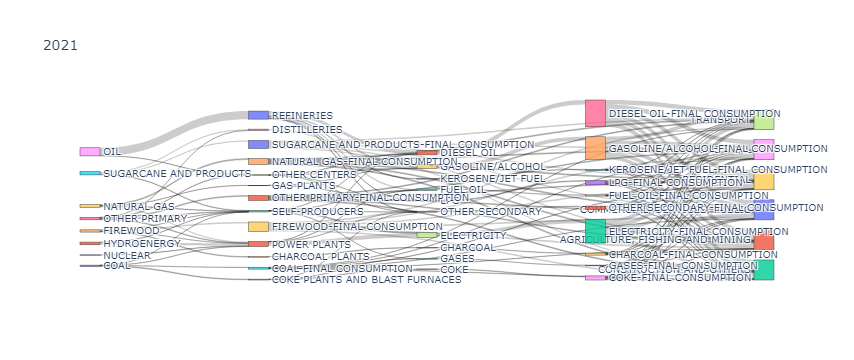

In [12]:
Plot(sheet_name, label, source, target, value)

### Basic example

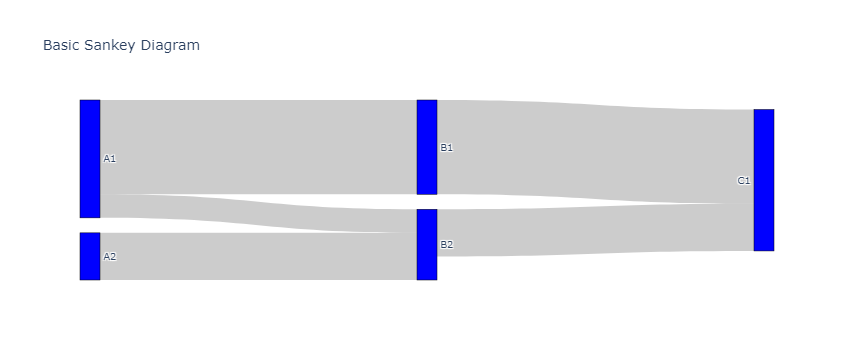

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 18 13:43:52 2023

@author: Pedram Manouchehri
"""



fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, np.nan]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [11]:
values

NameError: name 'values' is not defined